In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
#load in data
df=pd.read_csv("heart.csv")
df.head ()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [6]:
continuous=df.select_dtypes("float")
continuous.head()

,oldpeak
0,2.3
1,3.5
2,1.4
3,0.8
4,0.6


In [7]:
discrete=df.select_dtypes("integer")
discrete.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,0,0,1,1
1,37,1,2,130,250,0,1,187,0,0,0,2,1
2,41,0,1,130,204,0,0,172,0,2,0,2,1
3,56,1,1,120,236,0,1,178,0,2,0,2,1
4,57,0,0,120,354,0,1,163,1,2,0,2,1


<function matplotlib.pyplot.show(*args, **kw)>

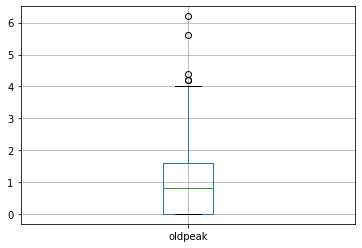

In [8]:
#outliers in the continuous features and solving using IQR
continuous.boxplot(column='oldpeak')
plt.show

In [9]:
continuous_iqr=continuous
Q1=continuous_iqr.quantile(0.25)
Q3=continuous_iqr.quantile(0.75)
IQR=Q3-Q1
print(IQR)

oldpeak    1.6
dtype: float64


In [10]:
threshold=3
(continuous_iqr<(Q1-threshold*IQR))|(continuous_iqr>(Q3+threshold*IQR))

,oldpeak
0,False
1,False
2,False
3,False
4,False
...,...
298,False
299,False
300,False
301,False


In [12]:
continuous_iqr.shape


(303, 304)

In [13]:
continuous_iqr_clean=(continuous_iqr<(Q1-threshold*IQR))|(continuous_iqr>(Q3+threshold*IQR)).any(axis=1)
continuous_iqr_clean.shape

(303, 304)

In [15]:
# Create X (all the feature columns)
x = df.drop("target", axis=1)

# Create y (the target column)
y = df["target"]
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [16]:

y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [17]:
#Backward Elimination
import statsmodels.api as sm
cols = list(x.columns)
pmax = 1
while (len(cols)>0):
    p= []
    x_1 = x[cols]
    x_1 = sm.add_constant(x_1)
    model = sm.OLS(y,x_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['sex', 'cp', 'thalach', 'exang', 'oldpeak', 'ca', 'thal']


In [42]:
#slice and scale data
#slice data and scale features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_fit = sc.fit(x)
x_std = x_fit.transform(x)
x

array([[ 6.30000000e+01,  1.00000000e+00,  3.00000000e+00, ...,
         8.19622277e-16, -1.13344612e-16,  1.00000000e+00],
       [ 3.70000000e+01,  1.00000000e+00,  2.00000000e+00, ...,
         8.19622277e-16, -1.13344612e-16,  2.00000000e+00],
       [ 4.10000000e+01,  1.03304297e-16,  1.00000000e+00, ...,
         2.00000000e+00, -1.13344612e-16,  2.00000000e+00],
       ...,
       [ 6.80000000e+01,  1.00000000e+00,  3.43174830e-16, ...,
         1.00000000e+00,  2.00000000e+00,  3.00000000e+00],
       [ 5.70000000e+01,  1.00000000e+00,  3.43174830e-16, ...,
         1.00000000e+00,  1.00000000e+00,  3.00000000e+00],
       [ 5.70000000e+01,  1.03304297e-16,  1.00000000e+00, ...,
         1.00000000e+00,  1.00000000e+00,  2.00000000e+00]])

In [29]:
#data balancing
y.head(), y.value_counts()

(0    1
 1    1
 2    1
 3    1
 4    1
 Name: target, dtype: int64,
 1    165
 0    138
 Name: target, dtype: int64)

In [32]:
#classification methods
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
k_fold = KFold(n_splits=12, shuffle=True, random_state=0)


In [51]:
#RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
clf = RandomForestClassifier(n_estimators=10)
scoring = 'accuracy'
score = cross_val_score(clf, x, y, cv=k_fold, n_jobs=1, scoring=scoring)
round(np.mean(score)*100, 2)



82.81

In [52]:
#DecisionTreeClassifier
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, x, y, cv=k_fold, n_jobs=1, scoring=scoring)
round(np.mean(score)*100, 2)

77.92

In [54]:
#GaussianNB
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, x, y, cv=k_fold, n_jobs=1, scoring=scoring)
round(np.mean(score)*100, 2)

82.51

In [55]:
#GradientBoostingClassifier
clf = GradientBoostingClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, x, y, cv=k_fold, n_jobs=1, scoring=scoring)
round(np.mean(score)*100, 2)

79.9